In [1]:
pip install pymysql sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing libraries-

import pandas as pd
import numpy as np
import json

In [3]:
#loading Dataset one by one into jupyter

business_chunks = pd.read_json(r'C:\Users\BHISHANDEV9811450004\Desktop\3.5x5\archive\yelp_academic_dataset_business.json',lines=True, chunksize=100000)
business_df = pd.concat(business_chunks) 

In [4]:
checkin_chunks = pd.read_json(r'C:\Users\BHISHANDEV9811450004\Desktop\3.5x5\archive\yelp_academic_dataset_checkin.json',lines=True, chunksize=100000)
checkin_df = pd.concat(checkin_chunks)

In [5]:
tip_chunks = pd.read_json(r'C:\Users\BHISHANDEV9811450004\Desktop\3.5x5\archive\yelp_academic_dataset_tip.json',lines=True, chunksize=100000)
tip_df = pd.concat(tip_chunks)   

In [6]:
user_chunks = pd.read_json(r'C:\Users\BHISHANDEV9811450004\Desktop\3.5x5\archive\yelp_academic_dataset_user.json', lines=True, chunksize=100000)
user_df = pd.concat(user_chunks)

In [7]:
review_chunks = pd.read_json(r'C:\Users\BHISHANDEV9811450004\Desktop\3.5x5\archive\yelp_academic_dataset_review.json', lines=True, chunksize=500000)
review_df = pd.concat(review_chunks)

In [8]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [9]:
#droping attributes and hours column from dataset
business_df = business_df.drop(['attributes','hours'],axis = 1)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


In [10]:
checkin_df['date']

0         2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1         2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
2                  2013-06-14 23:29:17, 2014-08-13 23:20:22
3         2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...
4         2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...
                                ...                        
131925    2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013...
131926                                  2021-06-12 01:16:12
131927    2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012...
131928             2016-12-03 23:33:26, 2018-12-02 19:08:45
131929                                  2015-01-06 17:51:53
Name: date, Length: 131930, dtype: object

In [11]:
#creating date_count column from date column and droping date column
checkin_df['date_count'] = checkin_df['date'].apply(lambda x: len(x) - len(x.replace(',','')) + 1)
checkin_df.drop('date', axis=1, inplace=True)
checkin_df.head()

,business_id,date_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26


In [12]:
user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [13]:
#droping friends column
user_df = user_df.drop("friends",axis=1)
user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,267,3.91,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3138,3.74,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013",52,3.32,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011",28,4.27,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,1,3.54,...,1,0,0,0,1,1,0,0,0,0


In [14]:
from sqlalchemy import create_engine

# MySQL database credentials-

username = 'root'
password = '123456'
host = 'localhost'  
port = '3306'       
database_name = 'monu'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database_name}')


In [ ]:
#loading dataset into mysql

business_df.to_sql('business', con=engine, if_exists='replace', index=False)
checkin_df.to_sql('checkin', con=engine, if_exists='replace', index=False)
tip_df.to_sql('tip', con=engine, if_exists='replace', index=False)
user_df.to_sql('user', con=engine, if_exists='replace', index=False)


In [6]:
#loading review dataset differntly bcz it is very large dataset
# Define the chunk size
chunk_size = 500000

# Iterate through the DataFrame in chunks
for start in range(0, len(review_df), chunk_size):
    end = start + chunk_size
    df_chunk = review_df.iloc[start:end]
    
    # Load the chunk into MySQL
    df_chunk.to_sql(name='review', con=engine, if_exists='append', index=False)

In [18]:
review_df.shape

(6990280, 9)

In [1]:
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import folium

from datetime import datetime

from matplotlib.colors import LinearSegmentedColormap

from IPython.display import display

import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import mysql.connector

# creating database connection
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="123456",
  database="monu"
)

In [3]:
tables = pd.read_sql_query("SHOW TABLES FROM monu",mydb)

tables

,Tables_in_monu
0,business
1,checkin
2,review
3,tip
4,user


In [4]:
#exploring what types of data we have in tables
for table in tables['Tables_in_monu'] :
    display(pd.read_sql_query(f"select * from {table} limit 5",mydb))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,267,3.91,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3138,3.74,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013",52,3.32,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011",28,4.27,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,1,3.54,...,1,0,0,0,1,1,0,0,0,0


In [5]:
pd.read_sql_query("select count(*) from business",mydb)

,count(*)
0,150346


In [6]:
#selecting restaurant business that are open
restaurant_business= pd.read_sql_query("select business_id,review_count,stars from business where lower(categories) like '%restaurant%' and is_open = 1",mydb)
restaurant_business.head()

,business_id,review_count,stars
0,MTSW4McQd7CbVtyjqoe9mw,80,4.0
1,CF33F8-E6oudUQ46HnavjQ,6,2.0
2,bBDDEgkFA1Otx9Lfe7BZUQ,10,1.5
3,eEOYSgkmpB90uNA7lDOMRA,10,4.0
4,il_Ro8jwPlHresjw9EGmBg,28,2.5


In [7]:
# calculating descriptive statistics like min,max,avg and median 

pd.read_sql_query(f"""
SELECT
    avg(review_count) as average_review_count, 
    min(review_count) as min_review_count, 
    max(review_count) as max_review_count,
    
    avg(stars) as average_star_rating,
    min(stars) as min_star_rating,
    max(stars) as max_star_rating
    
FROM business
WHERE business_id IN {tuple(restaurant_business['business_id'])}; """ ,mydb).transpose()

,0
average_review_count,104.097800
min_review_count,5.000000
max_review_count,7568.000000
average_star_rating,3.523969
min_star_rating,1.000000
max_star_rating,5.000000


In [8]:
median_review_count = restaurant_business['review_count'].median()
median_star_rating = restaurant_business['stars'].median()

print(median_review_count,median_star_rating)

40.0 3.5


In [9]:
restaurant_business.shape

(35004, 3)

In [10]:
#creating function so our dataset avoid outliers 
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [11]:
restaurant_business = remove_outliers(restaurant_business,'review_count')
restaurant_business.shape

(31537, 3)

In [12]:
pd.read_sql_query(f"""
SELECT
    avg(review_count) as average_review_count, 
    min(review_count) as min_review_count, 
    max(review_count) as max_review_count,
    
    avg(stars) as average_star_rating,
    min(stars) as min_star_rating,
    max(stars) as max_star_rating
    
FROM business
WHERE business_id IN {tuple(restaurant_business['business_id'])}; """ ,mydb).transpose()

,0
average_review_count,55.975400
min_review_count,5.000000
max_review_count,248.000000
average_star_rating,3.477281
min_star_rating,1.000000
max_star_rating,5.000000


In [13]:
median_review_count = restaurant_business['review_count'].median()
median_star_rating = restaurant_business['stars'].median()

print(median_review_count,median_star_rating)

33.0 3.5


In [14]:
#checking which restaurant has the highest number of review

pd.read_sql_query(f"""
SELECT
    name,
    sum(review_count) as review_count,
    avg(stars) as avg_rating 
FROM business
WHERE business_id IN {tuple(restaurant_business['business_id'])}
GROUP BY name
ORDER BY review_count DESC
LIMIT 10; """ , mydb)
    

,name,review_count,avg_rating
0,McDonald's,16490.0,1.868702
1,Chipotle Mexican Grill,9071.0,2.381757
2,Taco Bell,8017.0,2.141813
3,Chick-fil-A,7711.0,3.369427
4,First Watch,6761.0,3.875000
5,Panera Bread,6613.0,2.661905
6,Buffalo Wild Wings,6483.0,2.344828
7,Domino's Pizza,6091.0,2.290210
8,Wendy's,5930.0,2.030159
9,Chili's,5754.0,2.500000


In [15]:
#checking which restaurant has the highest number of rating

pd.read_sql_query(f"""
SELECT
    name,
    sum(review_count) as review_count,
    avg(stars) as avg_rating 
FROM business
WHERE business_id IN {tuple(restaurant_business['business_id'])}
GROUP BY name
ORDER BY avg_rating DESC
LIMIT 10; """ , mydb)

,name,review_count,avg_rating
0,Oat Bakery,123.0,5.0
1,Lian Hsing's,8.0,5.0
2,Jet City Espresso Hyde Park,152.0,5.0
3,American Express century and lounge,5.0,5.0
4,La Petite Iza,7.0,5.0
5,In and Out Express Food Market,5.0,5.0
6,European Flavors,11.0,5.0
7,bb.q Chicken - O'Fallon,42.0,5.0
8,The Kitchen Table,26.0,5.0
9,King Tut's,48.0,5.0


In [16]:
pd.read_sql_query("""
SELECT * 
FROM checkin;""",mydb)

,business_id,date_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [17]:
pd.read_sql_query("""
SELECT  business_id, count(*) tip_count
FROM tip
GROUP BY business_id
ORDER BY tip_count;
""",mydb)

,business_id,tip_count
0,6-cxfuwufT4vhxGyjSO8fA,1
1,Bc_Bw3dLw5S5hXM8UCFoqw,1
2,sPeP1lNNkxncioCJ80zyBA,1
3,ftw-PVfHugd_Nj_xZPAWwg,1
4,v92xgVl-BH_pQM486ea-9g,1
...,...,...
106188,Eb1XmmLWyt_way5NNZ7-Pw,826
106189,ytynqOUb3hjKeJfRj5Tshw,827
106190,_ab50qdWOk0DdB6XOrBitw,932
106191,-QI8Qi8XWH3D8y8ethnajA,1011


In [18]:
review_count_df = pd.read_sql_query(f"""
SELECT
    total.avg_rating as rating,
    avg(total.review_count) as avg_review_count,
    avg(total.checkin_count) as avg_checkin_count,
    avg(total.tip_count) as avg_tip_count
FROM
    (SELECT
        b.business_id,
        sum(b.review_count) as review_count,
        avg(b.stars) as avg_rating,
        sum(cc.date_count) as checkin_count,
        sum(tip.tip_count) as tip_count 
     FROM business b
     LEFT JOIN 
        checkin cc ON b.business_id = cc.business_id
     LEFT JOIN
        (SELECT  
            business_id, 
            count(business_id) tip_count
        FROM tip
        GROUP BY business_id) as tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(restaurant_business['business_id'])}
    GROUP BY b.business_id) as total
GROUP BY total.avg_rating
ORDER BY rating ;""", mydb)    
                

In [19]:
review_count_df

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.3651,17.5181,2.7815
1,1.5,24.3585,34.4810,3.8847
2,2.0,27.7596,52.3865,4.5811
3,2.5,36.6310,79.3494,6.3252
4,3.0,48.0550,105.9704,8.3019
5,3.5,63.7301,125.7817,10.3208
6,4.0,73.1370,127.1391,11.3294
7,4.5,65.2826,86.1776,8.9952
8,5.0,31.1280,27.5451,4.2691


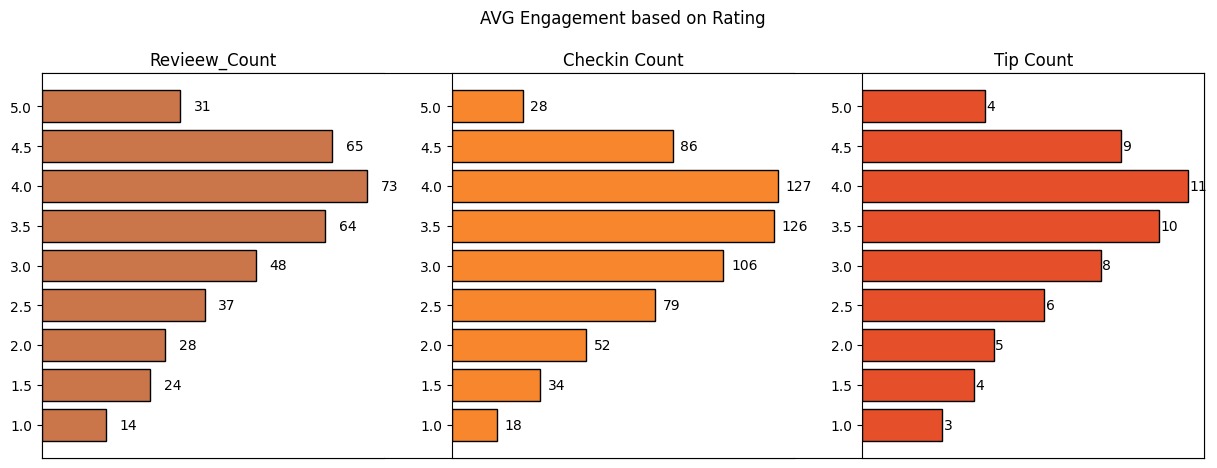

In [20]:
plt.figure(figsize = (15,5)) 
plt.title('AVG Engagement based on Rating\n\n')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,1)
plt.title('Revieew_Count')
plt.xticks([])
plt.barh(review_count_df['rating'].astype('str'),review_count_df['avg_review_count'],edgecolor = 'k', color = '#CB754B')
plt.gca().spines['right'].set_visible(False)
for i,value in enumerate(review_count_df['avg_review_count']):
    plt.text(value+3,i,str(round(value)),color = 'black',va='center')   


plt.subplot(1,3,2)
plt.title('Checkin Count')
plt.xticks([])
plt.barh(review_count_df['rating'].astype('str'),review_count_df['avg_checkin_count'],edgecolor = 'k', color = '#F8862C')
plt.gca().spines['right'].set_visible(False)
for i,value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value+3,i,str(round(value)),color = 'black',va='center')


plt.subplot(1,3,3)
plt.title('Tip Count')
plt.xticks([])
plt.barh(review_count_df['rating'].astype('str'),review_count_df['avg_tip_count'],edgecolor = 'k', color = '#E54F29')
for i,value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value+0.05,i,str(round(value)),color = 'black',va='center')

plt.show()  

In [21]:
#Is there a correlation between the numbers of tip , review and checkin for a business?
engagement_df = pd.read_sql_query(f"""
SELECT
    b.business_id,
    sum(b.review_count) as review_count,
    avg(b.stars) as avg_rating,
    sum(cc.date_count) as checkin_count,
    sum(tip.tip_count) as tip_count 
FROM business b
LEFT JOIN 
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (SELECT  
        business_id, 
        count(business_id) tip_count
    FROM tip
    GROUP BY business_id) as tip ON b.business_id = tip.business_id
WHERE 
    b.business_id IN {tuple(restaurant_business['business_id'])}
GROUP BY 
    b.business_id
;""", mydb).dropna()    
                

In [22]:
engagement_df[['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


<Axes: >

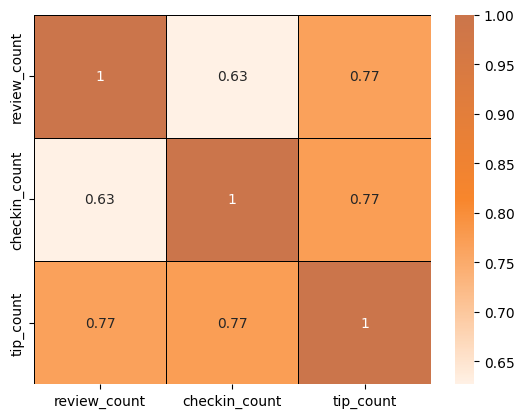

In [23]:
color = ['#FFF1E5','#F8862C','#CB754B']
custom_cmap = LinearSegmentedColormap.from_list('mycmap',color)
sns.heatmap(engagement_df[['review_count','checkin_count','tip_count']].corr(),cmap = custom_cmap,annot =True, linewidths =0.5,linecolor ='black')

In [24]:
engagement_df = pd.read_sql_query(f"""
SELECT
    b.business_id,
    sum(b.review_count) as review_count,
    avg(b.stars) as avg_rating,
    sum(cc.date_count) as checkin_count,
    sum(tip.tip_count) as tip_count,
    (CASE 
        WHEN AVG(b.stars) > 3.5 THEN 'High-Rated' 
        ELSE 'Low-Rated' 
    END) AS Category
FROM business b
LEFT JOIN 
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (SELECT  
        business_id, 
        count(business_id) tip_count
    FROM tip
    GROUP BY business_id) as tip ON b.business_id = tip.business_id
WHERE 
    b.business_id IN {tuple(restaurant_business['business_id'])}
GROUP BY 
    b.business_id
;""", mydb).dropna()    
engagement_df

,business_id,review_count,avg_rating,checkin_count,tip_count,Category
0,-CRjqZ4GxZ6lIa_qMj7-yw,58.0,3.5,54.0,6.0,Low-Rated
1,0pWF3x6Y4w55xGbfb1bTIA,185.0,4.0,318.0,35.0,High-Rated
2,0hPp_rLhzOVZ0YRbojvSeQ,55.0,4.0,56.0,13.0,High-Rated
3,-lT5o2BF6ZvSsh8PvpVOgQ,53.0,4.0,72.0,9.0,High-Rated
4,04o5yH6y_49RkLuEaiW5mg,50.0,3.0,35.0,12.0,Low-Rated
...,...,...,...,...,...,...
31476,g5GS2Mr42rKXzFrzea5GJw,10.0,4.0,1.0,1.0,High-Rated
31486,GzJ7QO-ooDh1yE-O9SHqnw,66.0,3.5,23.0,1.0,Low-Rated
31493,KE_oM4y1GMI3YMOnnqHqRQ,5.0,2.0,2.0,1.0,Low-Rated
31534,7vxVNF-yKvCUfj8OhlH_Cg,21.0,4.5,2.0,1.0,High-Rated


In [25]:
#Is there a difference in the user engagement (review,tips and checkin ) between high rated and low rated business?
engagement_df.groupby('Category')[['review_count','tip_count','checkin_count']].mean()

,review_count,tip_count,checkin_count
Category,,,
High-Rated,74.299375,10.065121,115.681302
Low-Rated,52.390839,8.039871,106.919161


In [26]:
#creating function for calculating the sucess based on avg rating and total review count

def calculate_sucess_metric(df):
    sucess_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1 )
        sucess_score.append(score)
    return sucess_score
                

In [27]:
#How do the sucess metrics (review,tips and checkin ) of restaurants vary across different states and cities?
pd.read_sql_query(f"""
select 
    city ,state ,avg(latitude) ,avg(longitude) ,avg(stars) as avg_rating ,sum(review_count) as review_count ,count(*) as restaurant_count
from business 
WHERE business_id IN {tuple(restaurant_business['business_id'])}
group by state,city
order by review_count desc
limit 10 ;""",mydb)


,city,state,avg(latitude),avg(longitude),avg_rating,review_count,restaurant_count
0,Philadelphia,PA,39.982274,-75.150003,3.532312,175606.0,3002
1,Tampa,FL,28.001731,-82.476943,3.568274,104751.0,1721
2,Indianapolis,IN,39.802349,-86.141398,3.412111,92639.0,1701
3,Tucson,AZ,32.233891,-110.936402,3.383885,91672.0,1421
4,Nashville,TN,36.142252,-86.770107,3.491465,87100.0,1406
5,New Orleans,LA,29.961270,-90.075371,3.694472,69309.0,1013
6,Saint Louis,MO,38.616387,-90.302794,3.414303,51490.0,811
7,Reno,NV,39.507601,-119.806460,3.479695,48569.0,591
8,Edmonton,AB,53.526310,-113.514226,3.509367,45986.0,1548
9,Boise,ID,43.608537,-116.239164,3.558824,36104.0,561


In [28]:
city_df = pd.read_sql_query(f"""
select 
    city ,state ,avg(latitude) ,avg(longitude) ,avg(stars) as avg_rating ,sum(review_count) as review_count ,count(*) as restaurant_count
from business 
WHERE business_id IN {tuple(restaurant_business['business_id'])}
group by state,city
order by review_count desc
limit 10 ;""",mydb)

city_df['sucess_score'] = calculate_sucess_metric(city_df)
city_df


,city,state,avg(latitude),avg(longitude),avg_rating,review_count,restaurant_count,sucess_score
0,Philadelphia,PA,39.982274,-75.150003,3.532312,175606.0,3002,42.656211
1,Tampa,FL,28.001731,-82.476943,3.568274,104751.0,1721,41.246934
2,Indianapolis,IN,39.802349,-86.141398,3.412111,92639.0,1701,39.022521
3,Tucson,AZ,32.233891,-110.936402,3.383885,91672.0,1421,38.664208
4,Nashville,TN,36.142252,-86.770107,3.491465,87100.0,1406,39.714800
5,New Orleans,LA,29.961270,-90.075371,3.694472,69309.0,1013,41.179856
6,Saint Louis,MO,38.616387,-90.302794,3.414303,51490.0,811,37.042331
7,Reno,NV,39.507601,-119.806460,3.479695,48569.0,591,37.548563
8,Edmonton,AB,53.526310,-113.514226,3.509367,45986.0,1548,37.676963
9,Boise,ID,43.608537,-116.239164,3.558824,36104.0,561,37.346958


In [29]:
#creating a new map
m = folium.Map(location = [city_df['avg(latitude)'].mean(), city_df['avg(longitude)'].mean()], zoom_start = 4)

#defining a color scale
color_scale = folium.LinearColormap(colors = ['green','yellow','#E54F29'], vmin = city_df['sucess_score'].min(),vmax = city_df['sucess_score'].max())

#Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location = [row['avg(latitude)'],row['avg(longitude)']],
        radius = 5,
        color = color_scale(row['sucess_score']),
        fill = True,
        fill_color = color_scale(row['sucess_score']),
        fill_opacity = 0.7,
        popup = f"Sucess Score: {row['sucess_score']}").add_to(m)

#Add color scale to map
m.add_child(color_scale)




        

In [30]:
# Query for High-rated engagement
high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count
FROM (
    SELECT DATE_FORMAT(date, '%m-%Y') AS month_year, COUNT(*) AS review_count
    FROM review
    WHERE business_id IN {tuple(restaurant_business['business_id'])} AND stars >= 3.5
    GROUP BY month_year
    ORDER BY month_year
) review
JOIN (
    SELECT AVG(b.stars), DATE_FORMAT(tip.date, '%m-%Y') AS month_year, COUNT(*) AS tip_count
    FROM tip
    JOIN business AS b ON tip.business_id = b.business_id
    WHERE tip.business_id IN {tuple(restaurant_business['business_id'])} AND b.stars >= 3.5
    GROUP BY month_year
    ORDER BY month_year
) tip
ON review.month_year = tip.month_year
""",mydb)

# Query for low-rated engagement
low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count
FROM (
    SELECT DATE_FORMAT(date, '%m-%Y') AS month_year, COUNT(*) AS review_count
    FROM review
    WHERE business_id IN {tuple(restaurant_business['business_id'])} AND stars < 3.5
    GROUP BY month_year
    ORDER BY month_year
) review
JOIN (
    SELECT AVG(b.stars), DATE_FORMAT(tip.date, '%m-%Y') AS month_year, COUNT(*) AS tip_count
    FROM tip
    JOIN business AS b ON tip.business_id = b.business_id
    WHERE tip.business_id IN {tuple(restaurant_business['business_id'])} AND b.stars < 3.5
    GROUP BY month_year
    ORDER BY month_year
) tip
ON review.month_year = tip.month_year
""",mydb)



In [31]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [32]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [33]:
time_rating = pd.read_sql_query(f""" SELECT DATE_FORMAT(date, '%m-%Y') as month_year, AVG(stars) as avg_rating
FROM review
WHERE business_id IN{tuple(restaurant_business['business_id'])}
GROUP BY month_year
ORDER BY month_year
""",mydb)

In [34]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year',inplace = True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year',inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year',inplace = True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']



In [35]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

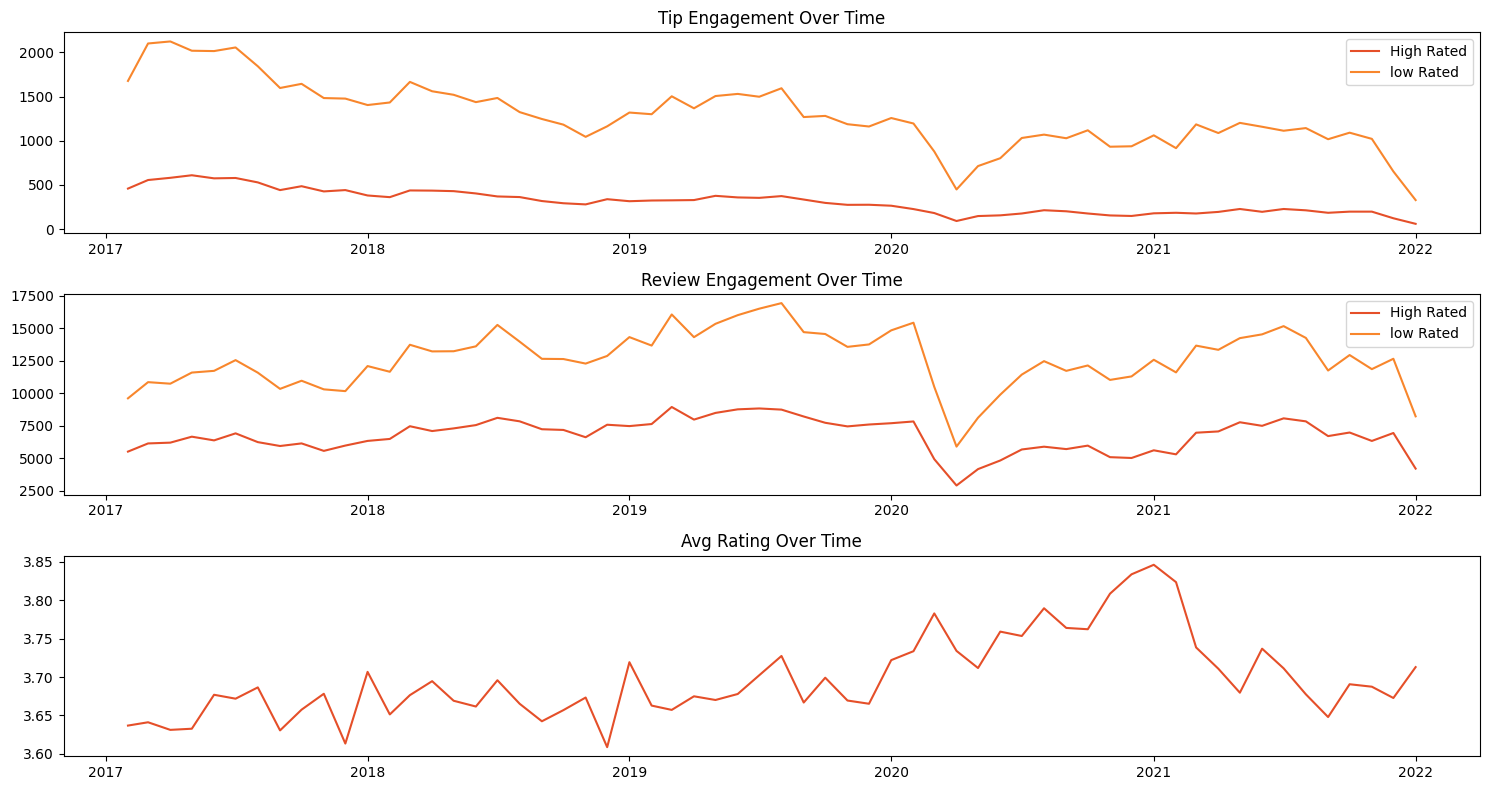

In [36]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],low_rated_engagement['tip_count'],label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'],high_rated_engagement['tip_count'],label = 'low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],low_rated_engagement['review_count'],label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'],high_rated_engagement['review_count'],label = 'low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'],time_rating['avg_rating'], color = '#E54F29')
plt.tight_layout()
plt.show()

In [37]:
tip_high_rated = high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')


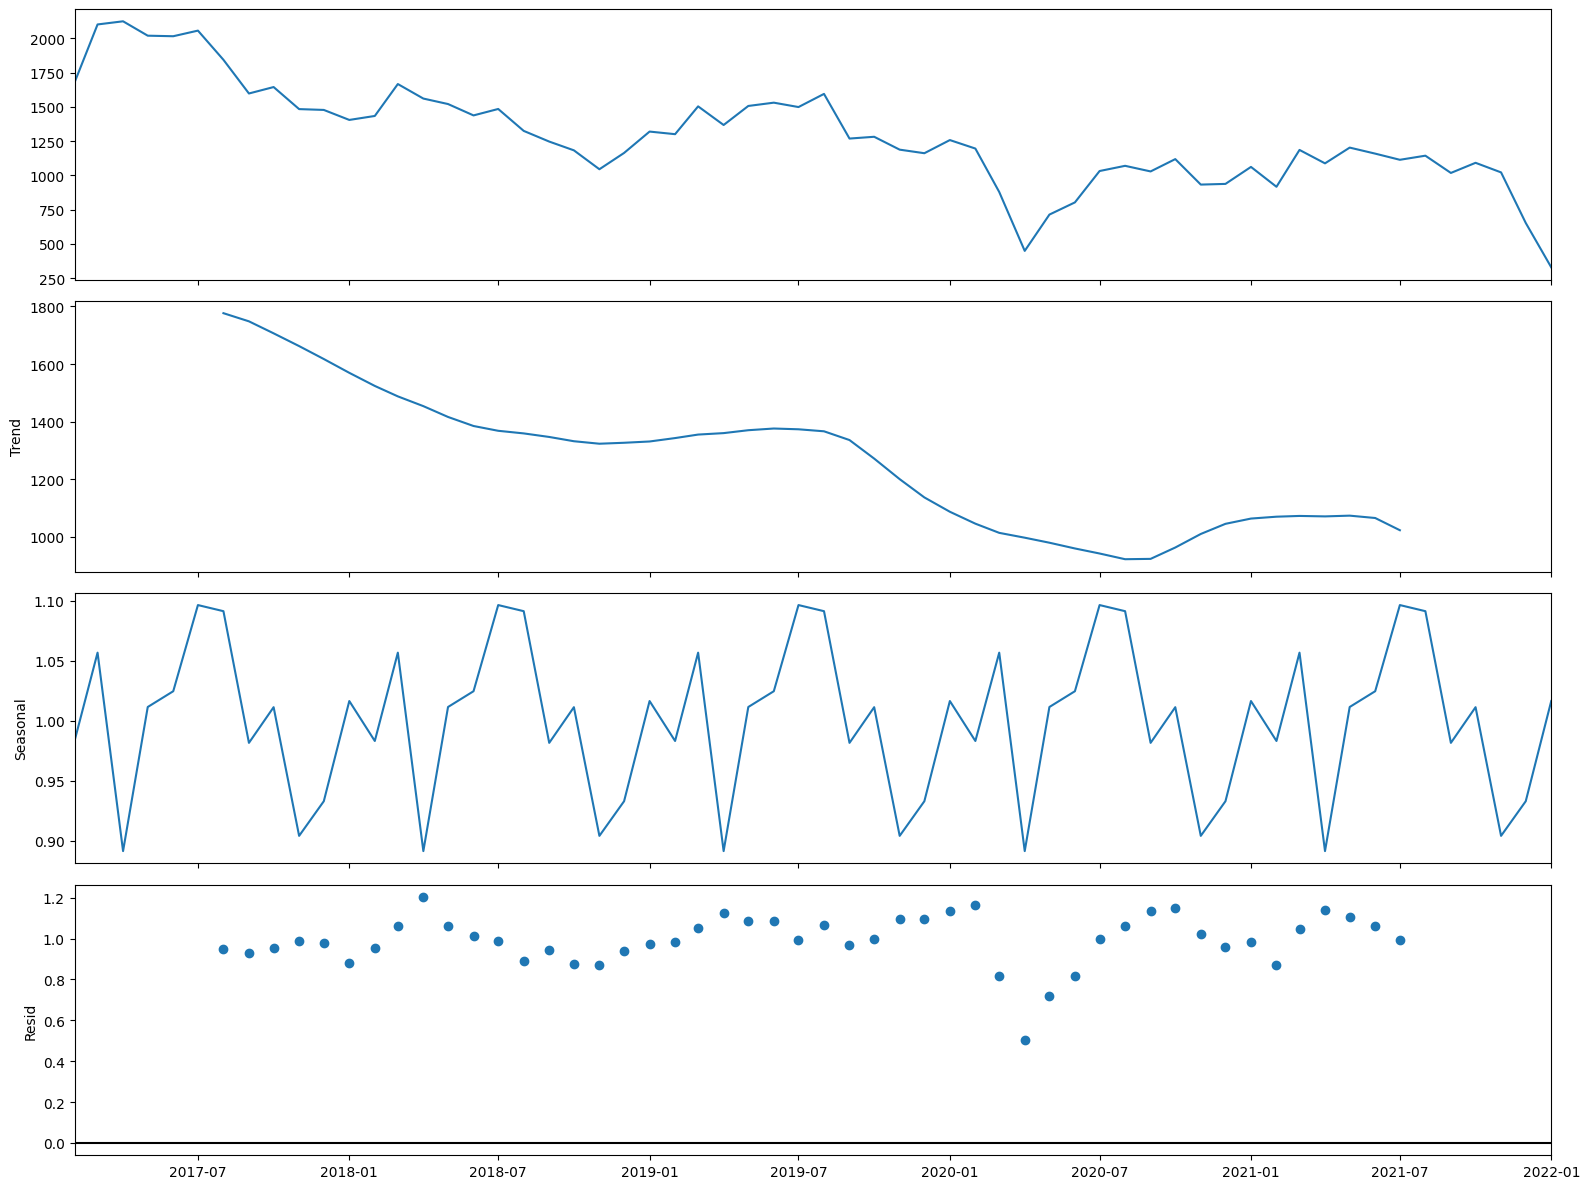

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decompsition = seasonal_decompose(tip_high_rated, model = 'multiplicative', period =12)
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decompsition.plot()
plt.show()


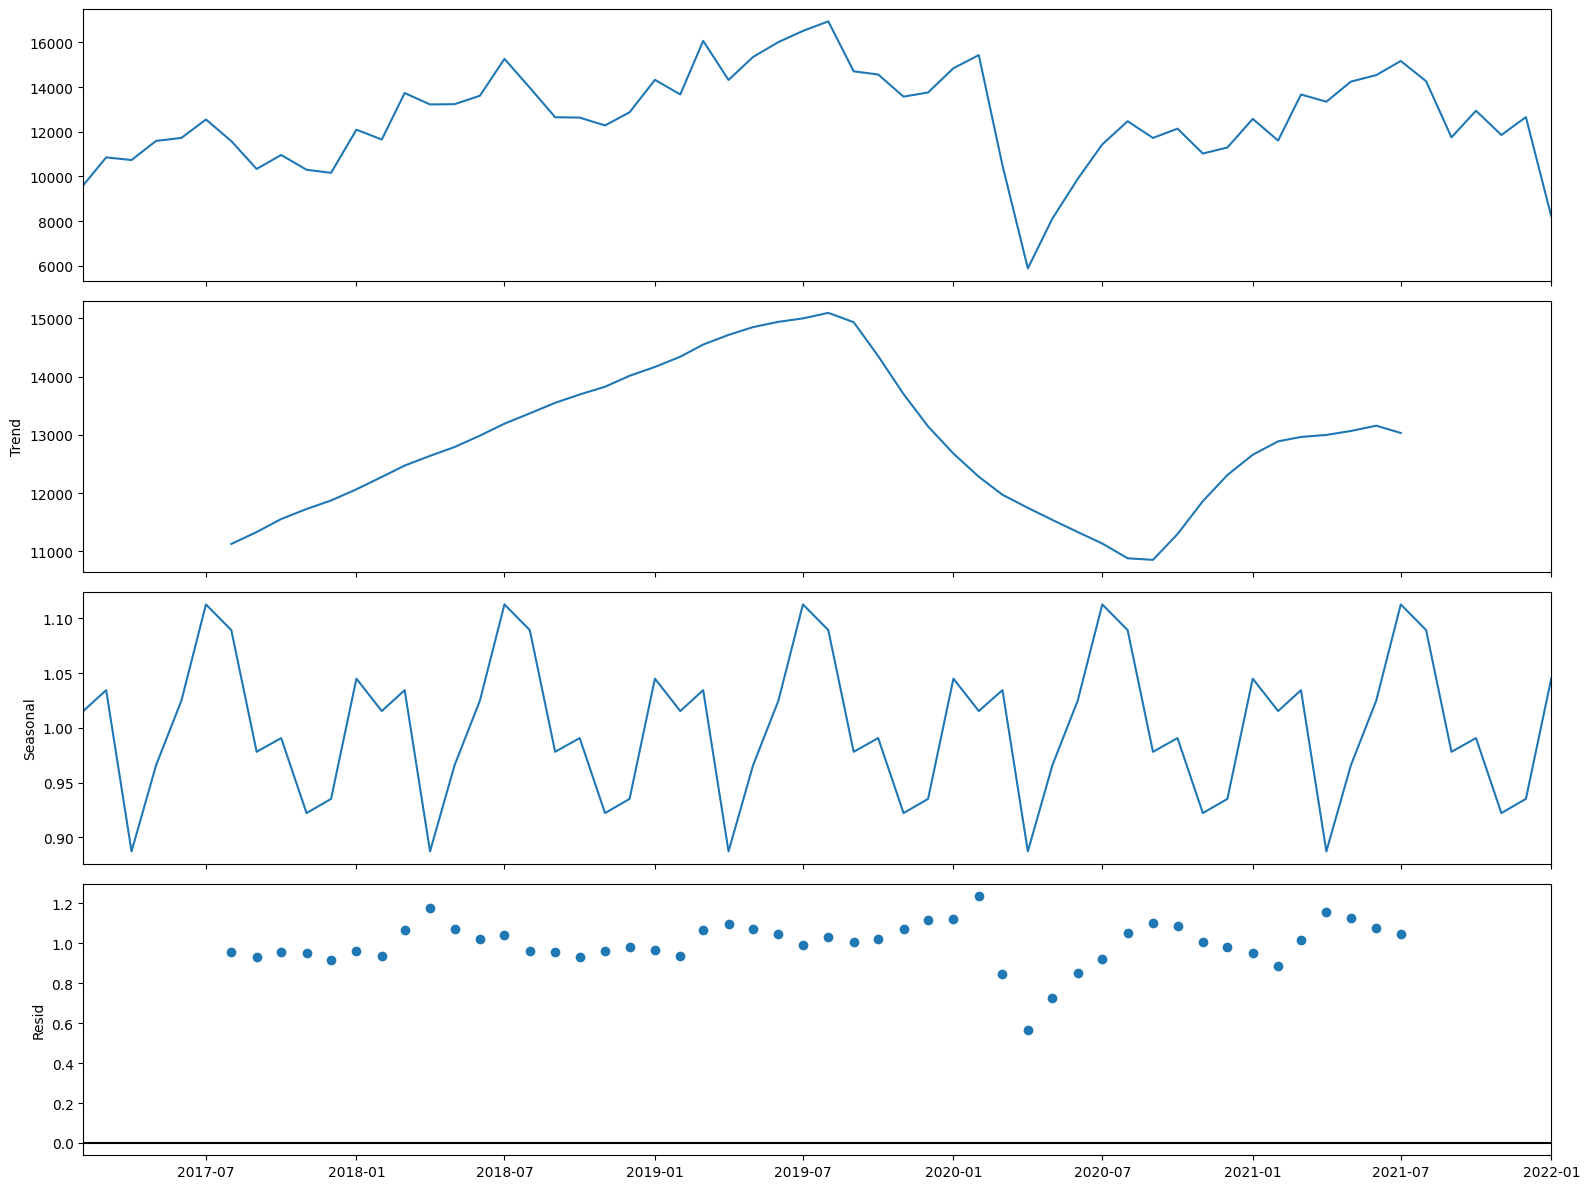

In [39]:
multiplicative_decompsition = seasonal_decompose(review_high_rated, model = 'multiplicative', period =12)
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decompsition.plot()
plt.show()

In [40]:
#How does sentiments of reviews and tips (useful,funny and cool) correlative with the sucess of restaurants

sentiment_df = pd.read_sql_query(f""" SELECT b.business_id, AVG(b.stars) as avg_rating,SUM(b.review_count) as review_count,
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM 
   (SELECT business_id,SUM(useful) as useful_count,SUM(funny) as funny_count,SUM(cool) as cool_count
   FROM review
   GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id
WHERE b.business_id IN{tuple(restaurant_business['business_id'])}
GROUP BY b.business_id
ORDER BY review_count
""",mydb)

sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,I2Yt2mJp0TJkdOnIpuOwew,3.0,5.0,3.0,4.0,1.0
1,4OxrTuQqlqSptzDF5aJuSA,3.0,5.0,3.0,3.0,3.0
2,uz9ZD1yBqoaAbwewhH2ZvQ,1.5,5.0,1.0,0.0,0.0
3,dj1Fra1xlOaoszXOhPi0oA,2.0,5.0,3.0,3.0,3.0
4,bECBfbtyRzNXlQvmBgaAcQ,3.0,5.0,3.0,2.0,1.0
...,...,...,...,...,...,...
31532,BJBSwMKADtYjqFDCL3-zkw,2.0,248.0,166.0,62.0,29.0
31533,5qmNrtr0iNyhCk6ky3c97w,3.0,248.0,179.0,37.0,21.0
31534,7dbUShu3yTUVNhTrdnF0FQ,4.0,248.0,58.0,16.0,27.0
31535,aOJDVHCn9iBIC33l_2HTRg,3.5,248.0,167.0,40.0,68.0


In [41]:
sentiment_df = remove_outliers(sentiment_df,'review_count')
sentiment_df = remove_outliers(sentiment_df,'useful_count')
sentiment_df = remove_outliers(sentiment_df,'funny_count')
sentiment_df = remove_outliers(sentiment_df,'cool_count')

In [42]:
sentiment_df['sucess_score'] = calculate_sucess_metric(sentiment_df)

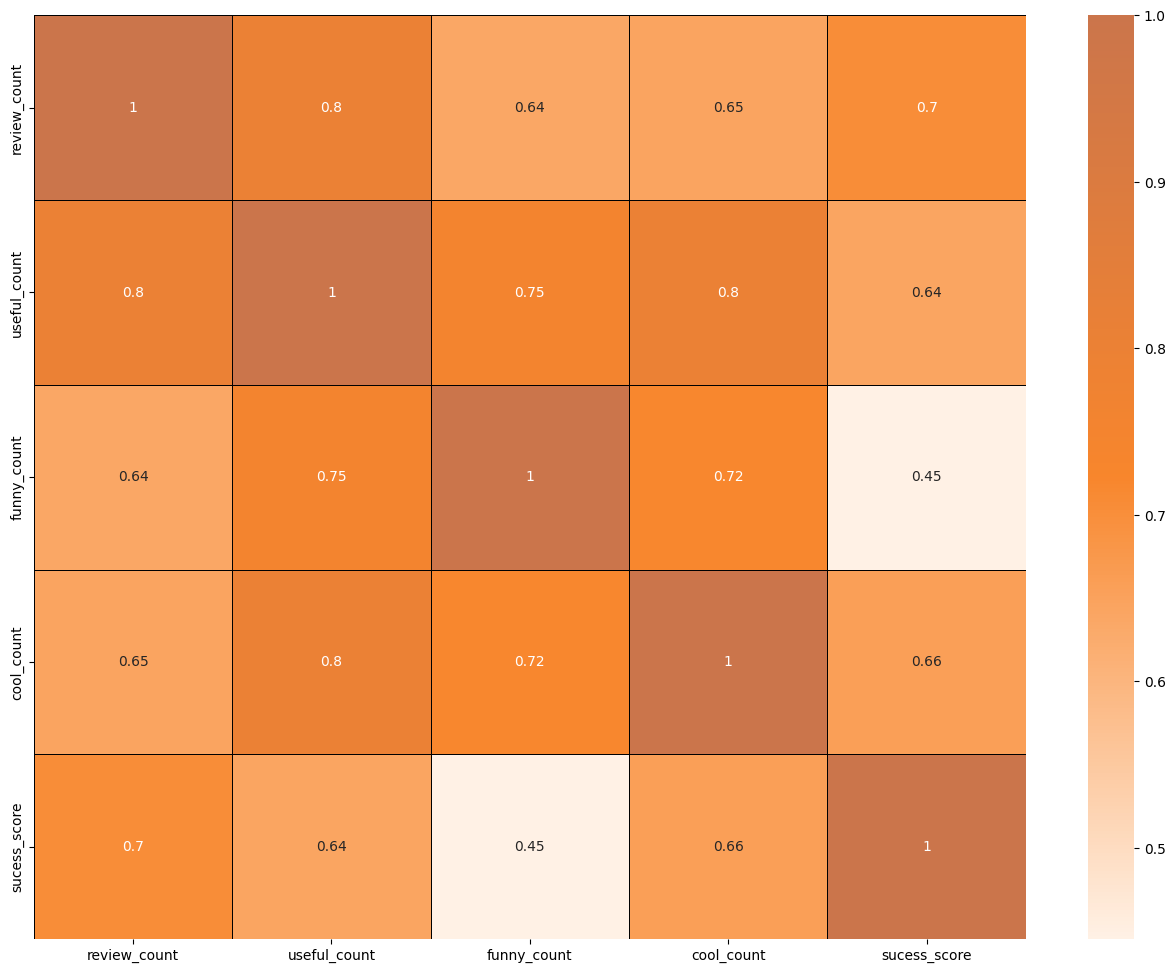

In [43]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(),cmap = custom_cmap, annot = True, linewidths =  0.5 , linecolor = 'black')
plt.show()

In [44]:
#checking the difference between engagement of elite users and non elite users-
elite_df = pd.read_sql_query(f"""
SELECT elite,COUNT(*) as row_count,SUM(review_count) as total_review_count
FROM
   (SELECT
        CASE
           WHEN elite = '' THEN 'Not Elite'
           ELSE 'Elite'
        END as elite,
        u.review_count
    FROM user u) as user_elite
GROUP BY elite;""",mydb)





In [45]:
elite_df

,elite,row_count,total_review_count
0,Elite,91198,20484441.0
1,Not Elite,1896699,26021235.0


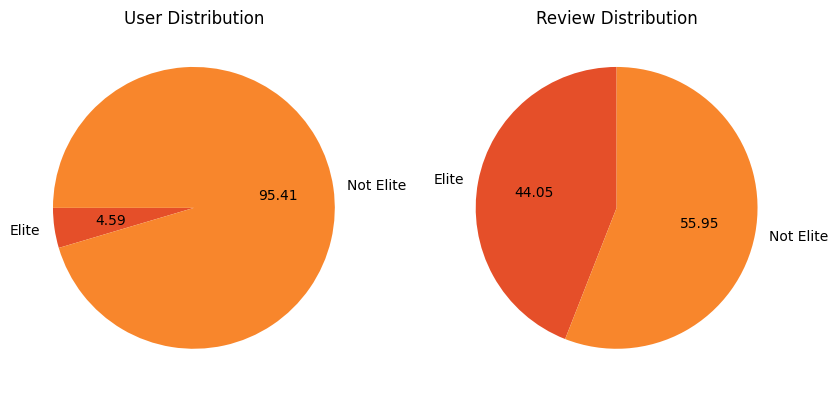

In [46]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['row_count'], labels = elite_df['elite'], autopct='%.2f' , startangle = 180 , colors = ['#E54F29','#F8862C'])

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct='%.2f' , startangle = 90 , colors = ['#E54F29','#F8862C'])
plt.show()

In [48]:
#checking business hours for restaurants
review_engagement = pd.read_sql_query(f""" 
SELECT
    HOUR(date) AS hour,
    COUNT(*) AS review_count
FROM
    review
GROUP BY
    HOUR(date);""",mydb)

tip_engagement = pd.read_sql_query(f""" 
SELECT
    HOUR(date) AS hour,
    COUNT(*) AS tip_count
FROM
    tip
GROUP BY
    HOUR(date);""",mydb)



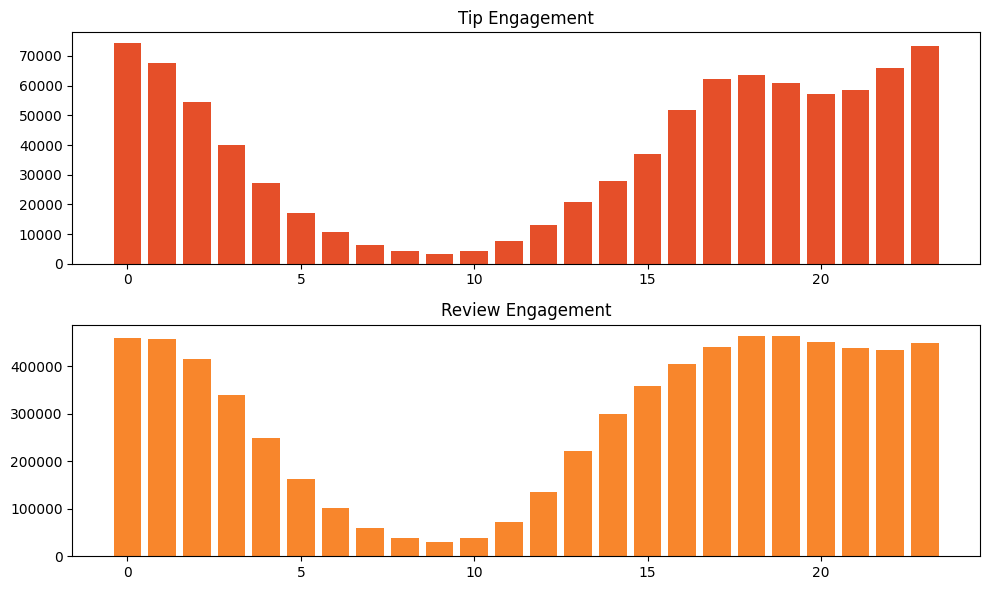

In [49]:
plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'],tip_engagement['tip_count'], color = '#E54F29')
plt.subplot(2,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'],review_engagement['review_count'], color = '#F8862C')
plt.tight_layout()
plt.show()
